## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [17]:
import os
import json
import helpers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

Factor Dictionaries 

In [18]:
#Read in file and turn it into a dataframe

Cr_data_path = "Cr_data/Cr_fd_2_9_2025"
Cu_data_path = "Cu_data/Cu_fd_2_10_2025"
Fe_data_path = "Fe_data/Fe_fd_2_10_2025"

factor_dict_dir_path = Path(Fe_data_path)
os.listdir(factor_dict_dir_path)

['logs',
 'mp-1005_factor_dict.json',
 'mp-1007881_factor_dict.json',
 'mp-1008872_factor_dict.json',
 'mp-1008927_factor_dict.json',
 'mp-1009019_factor_dict.json',
 'mp-1009592_factor_dict.json',
 'mp-1022130_factor_dict.json',
 'mp-1022236_factor_dict.json',
 'mp-1022242_factor_dict.json',
 'mp-1022315_factor_dict.json',
 'mp-1022325_factor_dict.json',
 'mp-1022329_factor_dict.json',
 'mp-1022464_factor_dict.json',
 'mp-1025047_factor_dict.json',
 'mp-1027782_factor_dict.json',
 'mp-1027814_factor_dict.json',
 'mp-1027859_factor_dict.json',
 'mp-1027898_factor_dict.json',
 'mp-1027992_factor_dict.json',
 'mp-1028021_factor_dict.json',
 'mp-1028142_factor_dict.json',
 'mp-1028160_factor_dict.json',
 'mp-1028207_factor_dict.json',
 'mp-1028242_factor_dict.json',
 'mp-1028387_factor_dict.json',
 'mp-1029659_factor_dict.json',
 'mp-1032174_factor_dict.json',
 'mp-1032452_factor_dict.json',
 'mp-1032522_factor_dict.json',
 'mp-1032542_factor_dict.json',
 'mp-1032625_factor_dict.json',
 '

Explore Factor Dictionary Data

In [19]:
mp_374 = helpers.print_factor_dict("Cr_data/Cr_fd_2_9_2025/mp-374_factor_dict.json")


Contents of mp-374_factor_dict.json:
--------------------------------------------------
MP-ID: mp-374
Material: CrB2
Space Group: P6/mmm
Space Group Number: 191
band_gap: 0.0
density: 5.3164020273198265
oxidation_states: {'Cr': 6.0, 'B': -3.0}
dipole moment normalized: [-1.3877787807814457e-17, 4.163336342344337e-17, 0.0]
normalized dipole anisotropy matrix: [[0.0, 5.551115123125783e-17, 1.3877787807814457e-17], [5.551115123125783e-17, 0.0, 4.163336342344337e-17], [1.3877787807814457e-17, 4.163336342344337e-17, 0.0]]
normalized dipole anisotropy matrix sum: 1.1102230246251565e-16
quadrupole moment normalized: [[-0.3700121475031763, 8.334382819302766e-09, 9.71445146547012e-17], [8.334382819302766e-09, -0.37001213787945697, 1.5265566588595902e-16], [9.71445146547012e-17, 1.5265566588595902e-16, -0.582578076044876]]
normalized quadrupole anisotropy matrix: [[0.0, 9.623719321449897e-09, 0.2125659285416997], [9.623719321449897e-09, 0.0, 0.21256593816541902], [0.2125659285416997, 0.21256593

#### Generate Factor DF

In [20]:
Cr_factor_df = helpers.generate_factor_df(Cr_data_path, mat_props = True, dipole = True, quadrupole = True)
#Cu_factor_df = helpers.generate_factor_df(Cu_data_path, mat_props = True, dipole = True, quadrupole = True)
#Fe_factor_df = helpers.generate_factor_df(Fe_data_path, mat_props = True, dipole = True, quadrupole = True)

factor_df = Cr_factor_df
#factor_df = Cu_factor_df
#factor_df = Fe_factor_df

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])


           Material  Space Group Number  Band Gap   Density  \
MP-ID                                                         
mp-1007974    CrNi3                 221       0.0  8.504336   
mp-1008280    CrCo3                 221       0.0  8.564414   
mp-1009079     CrTe                 225       0.0  6.370978   
mp-1009485      CrN                 221       0.0  6.837056   
mp-1009592   CrFeTe                 216       0.0  7.756716   

                                     Oxidation States          DM Norm 0  \
MP-ID                                                                      
mp-1007974  Oxidation states could not be determined.  Could not compute   
mp-1008280  Oxidation states could not be determined.  Could not compute   
mp-1009079                    {'Cr': 2.0, 'Te': -2.0}                0.0   
mp-1009485                     {'Cr': 3.0, 'N': -3.0}                0.0   
mp-1009592  Oxidation states could not be determined.  Could not compute   

            DM Norm 1  DM

Load Anisotropy Matricies 

In [21]:
#Read in file and turn it into a dataframe
Cr_a_matrix_path = "Cr_data/a_matrix_data/04FEB25anisotropy_data.csv"
Cu_a_matrix_path = "Cu_data/a_matrix/Cu_05FEB_anisotropy_data.csv"
Fe_a_matrix_path = "Fe_data/a_matrix/Fe_05FEB25_anisotropy_data.csv"

Cr_spectra_df = helpers.load_anisotropy_matrix(Cr_a_matrix_path, "Cr")
#Cu_spectra_df = load_anisotropy_matrix(Cu_a_matrix_path, "Cu")
#Fe_spectra_df = helpers.load_anisotropy_matrix(Fe_a_matrix_path, "Fe")

spectra_df = Cr_spectra_df
#spectra_df = Cu_spectra_df
#spectra_df = Fe_spectra_df

#Check matrix formatting
print(spectra_df.head())
print(spectra_df.shape[0])

            m00           m01           m02           m10  m11           m12  \
Material                                                                       
mp-1007974  0.0  1.624495e-08  8.845475e-08  1.624495e-08  0.0  7.220980e-08   
mp-1008280  0.0  3.981900e-05  3.823830e-05  3.981900e-05  0.0  7.805731e-05   
mp-1009079  0.0  1.610815e-06  9.435559e-07  1.610815e-06  0.0  2.554371e-06   
mp-1009485  0.0  8.745515e-08  1.286774e-07  8.745515e-08  0.0  4.122227e-08   
mp-1009592  0.0  1.841393e-07  5.119058e-07  1.841393e-07  0.0  6.960450e-07   

                     m20           m21  m22  
Material                                     
mp-1007974  8.845475e-08  7.220980e-08  0.0  
mp-1008280  3.823830e-05  7.805731e-05  0.0  
mp-1009079  9.435559e-07  2.554371e-06  0.0  
mp-1009485  1.286774e-07  4.122227e-08  0.0  
mp-1009592  5.119058e-07  6.960450e-07  0.0  
745


Clean data 

In [22]:
factor_df, spectra_df = helpers.align_dataframes(factor_df, spectra_df)

Check the cleaning and alligning

In [23]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Material  Space Group Number  Band Gap   Density  \
mp-1009079     CrTe                 225       0.0  6.370978   
mp-1009485      CrN                 221       0.0  6.837056   
mp-1014993     CrN2                 205       0.0  4.929940   
mp-1014995     CrN2                 166       0.0  1.577121   
mp-1016059     CrN2                 141       0.0  1.569859   

                   Oxidation States DM Norm 0     DM Norm 1     DM Norm 2  \
mp-1009079  {'Cr': 2.0, 'Te': -2.0}       0.0  0.000000e+00  0.000000e+00   
mp-1009485   {'Cr': 3.0, 'N': -3.0}       0.0  0.000000e+00  0.000000e+00   
mp-1014993   {'Cr': 6.0, 'N': -3.0}      -0.0  6.938894e-17  5.551115e-17   
mp-1014995   {'Cr': 6.0, 'N': -3.0} -0.011092  2.856327e-03 -3.127093e-02   
mp-1016059   {'Cr': 6.0, 'N': -3.0}  0.017232 -5.860271e-02 -1.057189e-02   

            Aniso DM 0    Aniso DM 1  ...  Aniso QM 0    Aniso QM 1  \
mp-1009079         0.0  0.000000e+00  ...         0.0  2.081668e-17   
mp-100

Compute normed spacegroup number

In [24]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)

                  Material  Space Group Number  Band Gap   Density  \
mp-1009079            CrTe                 225       0.0  6.370978   
mp-1009485             CrN                 221       0.0  6.837056   
mp-1014993            CrN2                 205       0.0  4.929940   
mp-1014995            CrN2                 166       0.0  1.577121   
mp-1016059            CrN2                 141       0.0  1.569859   
...                    ...                 ...       ...       ...   
mp-850902   CrFe3Ni2(PO4)6                 146       0.0  3.420563   
mp-861904        La3AlCrS7                 173       0.0  4.375139   
mp-9630             TlCrS2                 160       0.0  6.417426   
mp-9916             NbCrSi                 189       0.0  6.771817   
mp-998397           KCrCl3                 161       0.0  2.679273   

                                             Oxidation States DM Norm 0  \
mp-1009079                            {'Cr': 2.0, 'Te': -2.0}       0.0   
mp-100948

Compute sum of DM and QM Aniso sum

In [25]:
factor_df["Aniso Sum DM QM"] = factor_df["Aniso Sum DM"] + factor_df["Aniso Sum QM"]

Sum anisotropy matrix elements

In [26]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df)

print(spectra_df)


            m00           m01           m02           m10  m11           m12  \
mp-1009079  0.0  1.610815e-06  9.435559e-07  1.610815e-06  0.0  2.554371e-06   
mp-1009485  0.0  8.745515e-08  1.286774e-07  8.745515e-08  0.0  4.122227e-08   
mp-1014993  0.0  3.697036e-07  2.997498e-07  3.697036e-07  0.0  6.995376e-08   
mp-1014995  0.0  4.619549e-02  3.306184e-02  4.619549e-02  0.0  1.313365e-02   
mp-1016059  0.0  2.402438e-02  2.247861e-02  2.402438e-02  0.0  1.545772e-03   
...         ...           ...           ...           ...  ...           ...   
mp-850902   0.0  2.835948e-04  1.347509e-03  2.835948e-04  0.0  1.063914e-03   
mp-861904   0.0  1.391754e-06  6.254893e-02  1.391754e-06  0.0  6.254754e-02   
mp-9630     0.0  1.424267e-03  3.744101e-02  1.424267e-03  0.0  3.601674e-02   
mp-9916     0.0  2.375355e-02  9.632783e-02  2.375355e-02  0.0  7.257428e-02   
mp-998397   0.0  1.950417e-03  9.625525e-03  1.950417e-03  0.0  7.675108e-03   

                     m20           m21 

## Distribution of anisotropy matrix sum

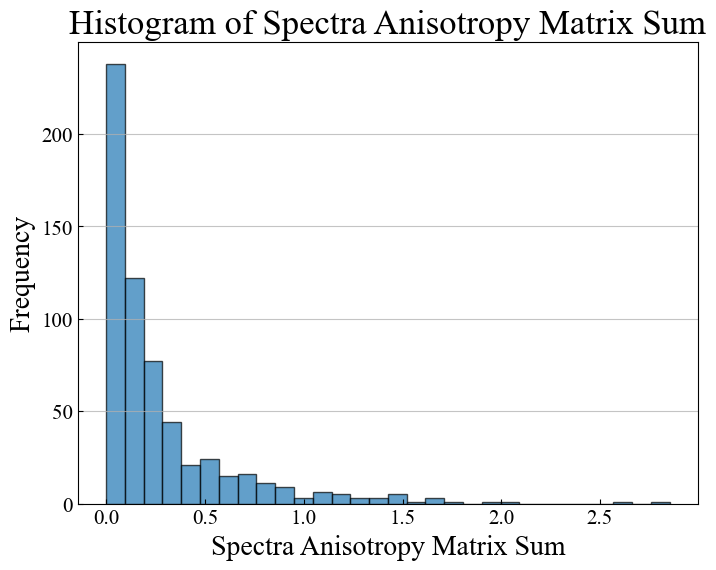

In [27]:

# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(spectra_df["anisotropy_matrix_sum"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Spectra Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Spectra Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Distribution of Dipole Anisotropy Matrix Sum

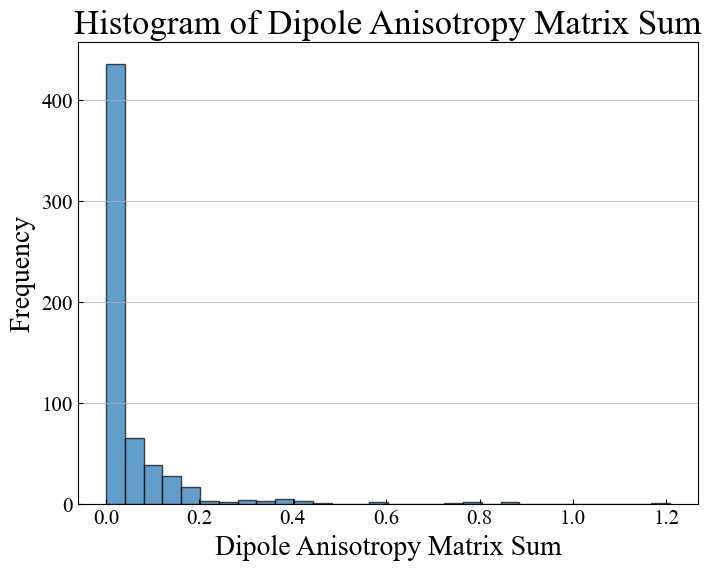

In [28]:
# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(factor_df["Aniso Sum DM"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Dipole Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Dipole Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Distribution of Quadrupole Anisotropy Matrix Sum

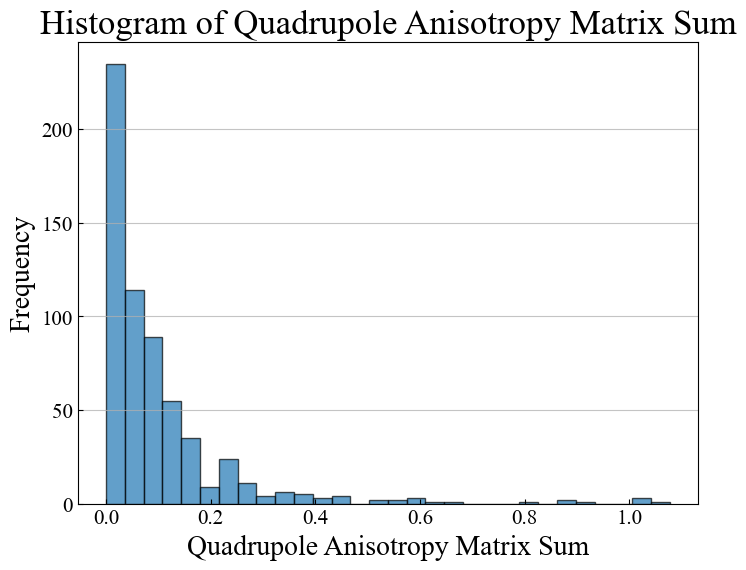

In [29]:

# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(factor_df["Aniso Sum QM"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Quadrupole Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Quadrupole Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

### Look at scale of the QM aniso sum and anisotropy matrix sum

In [30]:
def sort_and_print_columns(column1, column2):
    """
    Sorts two columns (Pandas Series) in ascending order and prints them.

    Parameters:
    - column1: First column (Pandas Series) to sort, labeled as "Factor Column".
    - column2: Second column (Pandas Series) to sort, labeled as "Anisotropy Matrix Column".

    Returns:
    - None: Prints the sorted columns.
    """
    # Sort the columns
    sorted_column1 = column1.sort_values()
    sorted_column2 = column2.sort_values()

    # Print the sorted columns
    print("Sorted Factor Column:")
    print(sorted_column1)
    print("\nSorted Anisotropy Matrix Column:")
    print(sorted_column2)


sort_and_print_columns(factor_df["Aniso Sum QM"], spectra_df["anisotropy_matrix_sum"])

Sorted Factor Column:
mp-1059289    0.000000
mp-1080726    0.000000
mp-1205606    0.000000
mp-555036     0.000000
mp-1024044    0.000000
                ...   
mp-1179963    0.920530
mp-1245723    1.005246
mp-1246666    1.023207
mp-12905      1.033846
mp-22310      1.076929
Name: Aniso Sum QM, Length: 611, dtype: float64

Sorted Anisotropy Matrix Column:
mp-1522607    1.038355e-07
mp-1183679    2.142226e-07
mp-753982     2.622148e-07
mp-1009485    3.035877e-07
mp-18841      3.687671e-07
                  ...     
mp-757733     1.776574e+00
mp-2224753    1.966430e+00
mp-1179963    2.088407e+00
mp-1246666    2.600403e+00
mp-2242301    2.851904e+00
Name: anisotropy_matrix_sum, Length: 611, dtype: float64


### Analyze correlations using Ordinary Least Squares (OLS)

#### Factor contributions

I'm going to start with only the un-normalized quadrupole moments

#### Anisotropy matrix formatting

I'm going to simplify the anisotropy matrix down to its base value by just summing all the values to get only a single 'anisotropy parameter' that I will be trying to predict. Later I'll look at the 3 off diagonal values independently.

In [33]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)

columns_to_use = [
    "Aniso Sum DM QM",
    "Aniso Sum DM",
    "Aniso DM 1",
    "Aniso DM 2",
    "Aniso DM 5",
    "Aniso Sum QM",
    "QM Norm 0",
    "QM Norm 4",
    "QM Norm 8",
    "Aniso QM 1",
    "Aniso QM 2",
    "Aniso QM 5",
    "Band Gap",
    "Density",
    "Normed Spacegroup Number"
]

#X = factor_df
X = factor_df[columns_to_use]

#Declare y
y = spectra_df["anisotropy_matrix_sum"]


# Ensure X and y are aligned
X, y = X.align(y, axis=0)

# Convert all data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Drop any rows with NaN values in X or y
X = X.dropna()
y = y.loc[X.index]  # Ensure the index alignment is maintained

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     anisotropy_matrix_sum   R-squared:                       0.595
Model:                               OLS   Adj. R-squared:                  0.587
Method:                    Least Squares   F-statistic:                     73.25
Date:                   Tue, 18 Feb 2025   Prob (F-statistic):          6.06e-109
Time:                           11:07:52   Log-Likelihood:                 24.219
No. Observations:                    611   AIC:                            -22.44
Df Residuals:                        598   BIC:                             34.96
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\John\AppData\Local\Temp\ipykernel_22924\1122481050.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
C:\Users\John\AppData\Local\Temp\ipykernel_22924\1122481050.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)


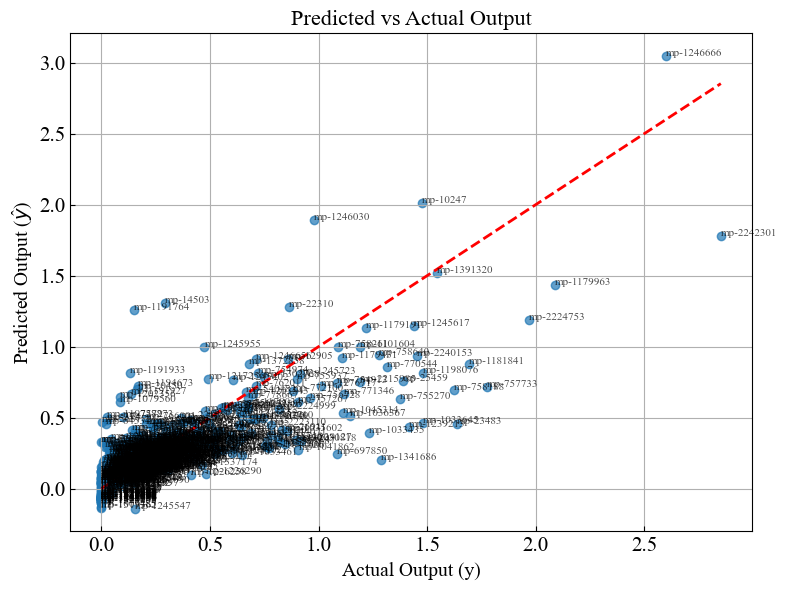

In [34]:
# Predicted output from the model
y_pred = results.predict(X)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

# Annotate each point with its index label
for i, txt in enumerate(y.index):
    plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()